In [1]:
# Q1 - Import data into Python environment.
import pandas as pd
Telecom = pd.read_csv("/home/labsuser//Datasets/Comcast_telecom_complaints_data.csv")
Telecom

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [45]:
# Q2 - Provide the trend chart for the number of complaints at monthly and daily granularity levels.
## part 1 at date level
DataforTrendChart = Telecom.groupby('Date')['Date'].agg(len)
DataforTrendChart
type(DataforTrendChart)
DFforTrendChart = pd.DataFrame(DataforTrendChart)
DFforTrendChart.columns=['Freq']
DFforTrendChart

,Freq
Date,
2015-01-04,18
2015-01-05,12
2015-01-06,25
2015-02-04,27
2015-02-05,7
...,...
2015-11-05,12
2015-11-06,21
2015-12-04,15


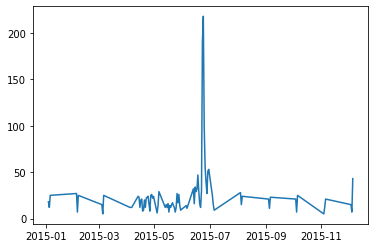

In [47]:
import matplotlib.pyplot as plt
plt.plot(DFforTrendChart.Freq)
plt.show()

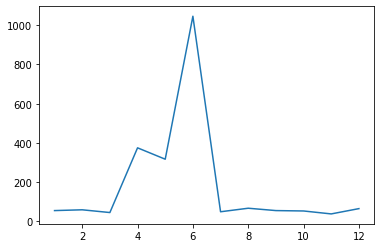

In [48]:
#Part II at month level
Telecom.Date.dtype
import datetime
Telecom['Date'] = pd.to_datetime(Telecom.Date, format="%d-%m-%y")
Telecom['Month'] = Telecom['Date'].dt.month
 
DataforTrendChart = Telecom.groupby('Month')['Month'].agg(len)
DataforTrendChart
type(DataforTrendChart)
DFforTrendChart = pd.DataFrame(DataforTrendChart)
plt.plot(DFforTrendChart.Month)
plt.show()

In [49]:
#Q3 - - Provide a table with the frequency of complaint types.
pd.value_counts(Telecom['Customer Complaint'])

Comcast                                                                               83
Comcast Internet                                                                      18
Comcast Data Cap                                                                      17
comcast                                                                               13
Comcast Data Caps                                                                     11
                                                                                      ..
Comcast overbilled me and added numerous hidden charges                                1
Overcharge/ promo end                                                                  1
Comcast Downgraded service with no notification                                        1
Comcast internet speeds                                                                1
Comcast speeds as low as 12 MB/s, paying for 105 MB/s and they wont figure it out.     1
Name: Customer Compla

In [50]:
#Q 4 - Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
Telecom.Status.unique()
Telecom['Status_New'] = Telecom['Status'].map({'Open':'Open','Closed':'close','Solved':'close','Pending':'Open'})

In [51]:
Q5 = Telecom.groupby(['State','Status_New'])['Status_New'].agg(len)
type(Q5)
Q5 = pd.DataFrame(Q5)
 
Q5_renamed = Q5.rename(columns={'Status_New':"Freq"})
 
Q5_1  = Q5_renamed.reset_index()
type(Q5_1)
Q5_1

,State,Status_New,Freq
0,Alabama,Open,9
1,Alabama,close,17
2,Arizona,Open,6
3,Arizona,close,14
4,Arkansas,close,6
...,...,...,...
72,Virginia,close,49
73,Washington,Open,23
74,Washington,close,75
75,West Virginia,Open,3


In [52]:
Q5_1_subset = Q5_1
Q5_1_subset_open = Q5_1_subset.query("Status_New == 'Open'")
Q5_1_subset_close = Q5_1_subset.query("Status_New == 'close'")
Q5_1_subset_open

,State,Status_New,Freq
0,Alabama,Open,9
2,Arizona,Open,6
5,California,Open,61
7,Colorado,Open,22
9,Connecticut,Open,3
11,Delaware,Open,4
13,District Of Columbia,Open,2
16,Florida,Open,39
18,Georgia,Open,80
20,Illinois,Open,29


In [53]:
Q5_1_subset_close

,State,Status_New,Freq
1,Alabama,close,17
3,Arizona,close,14
4,Arkansas,close,6
6,California,close,159
8,Colorado,close,58
10,Connecticut,close,9
12,Delaware,close,8
14,District Of Columbia,close,14
15,District of Columbia,close,1
17,Florida,close,201


In [37]:
Q5_Final = pd.concat([Q5_1_subset_open.set_index('State').rename(columns={'Freq':'Open'}).drop('Status_New',axis=1),
           Q5_1_subset_close.set_index('State').rename(columns={'Freq':'Close'}).drop('Status_New',axis=1)],axis=1)
Q5_Final

,Open,Close
Alabama,9.0,17
Arizona,6.0,14
California,61.0,159
Colorado,22.0,58
Connecticut,3.0,9
Delaware,4.0,8
District Of Columbia,2.0,14
Florida,39.0,201
Georgia,80.0,208
Illinois,29.0,135


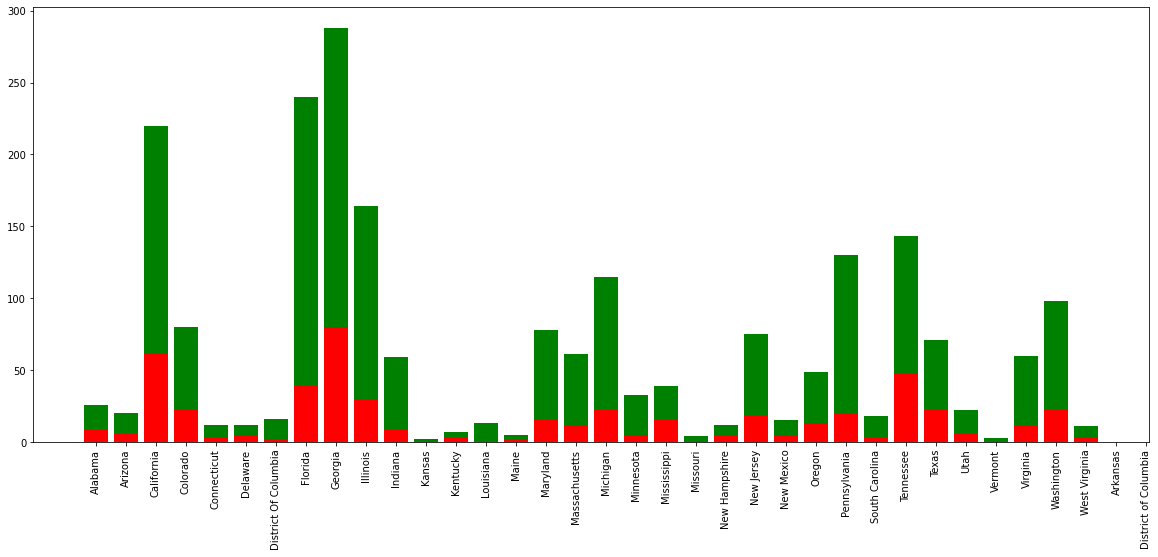

In [38]:
plt.figure(figsize=(20,8))
plt.bar(Q5_Final.index ,Q5_Final.Open,color='red')
plt.bar(Q5_Final.index ,Q5_Final.Close, bottom =Q5_Final.Open,color='green')
plt.xticks(rotation=90)
plt.show()

In [40]:
# Q5 (insights) - Which state has the highest percentage of unresolved complaints
Unsolved_c = pd.crosstab(Telecom.State,Telecom.Status_New)
type(Unsolved_c)
Unsolved_c['Unsolved_pct'] = Unsolved_c.Open/(Unsolved_c.Open+Unsolved_c.close)
Unsolved_c
Unsolved_c.sort_values(['Unsolved_pct'],ascending=False).iloc[0,:]
Unsolved_c

Status_New,Open,close,Unsolved_pct
State,,,
Alabama,9,17,0.346154
Arizona,6,14,0.300000
Arkansas,0,6,0.000000
California,61,159,0.277273
Colorado,22,58,0.275000
Connecticut,3,9,0.250000
Delaware,4,8,0.333333
District Of Columbia,2,14,0.125000
District of Columbia,0,1,0.000000


In [11]:
# use case scenario of using a find function. This can be used for categorizing the complaint type in the comcast project
import pandas as pd
Emp1= pd.DataFrame({"Name":["John-Smith","Angel-Brown"],"Age":[34,32]})
Emp1
Emp1['Position_of_Dlm']= Emp1['Name'].str.find("Smith")
Emp1

,Name,Age,Position_of_Dlm
0,John-Smith,34,5
1,Angel-Brown,32,-1


In [12]:
ca_house = pd.read_excel("/home/labsuser//Datasets/California_housing.xlsx")
ca_house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [13]:
ca_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [14]:
import numpy as np
transformed_price = np.log(ca_house.median_house_value)
transformed_price = pd.DataFrame(transformed_price)
transformed_price.columns = ['Log_transformed']
transformed_price

,Log_transformed
0,13.022764
1,12.789684
2,12.771671
3,12.740517
4,12.743151
...,...
20635,11.265745
20636,11.252859
20637,11.432799
20638,11.346871


In [15]:
ca_house1 = pd.concat([ca_house,transformed_price],axis=1)
ca_house1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,Log_transformed
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600,13.022764
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500,12.789684
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100,12.771671
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300,12.740517
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200,12.743151
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100,11.265745
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100,11.252859
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300,11.432799
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700,11.346871


In [16]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm_model = lm.fit(pd.DataFrame(ca_house1.median_income),ca_house1.Log_transformed)
lm_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
lm_model.intercept_

11.321403126932864

In [18]:
lm_model.coef_

array([0.19724773])

In [19]:
predicted_log = lm_model.predict(pd.DataFrame(ca_house1.median_income))
predicted_log

array([12.96352991, 12.95883541, 12.75290878, ..., 11.65672426,
       11.68970408, 11.79254905])

In [20]:
np.exp(predicted_log)

array([426569.20977667, 424571.3754474 , 345555.58198452, ...,
       115465.17674082, 119336.68744668, 132263.18581398])

In [21]:
pd.concat([ca_house1,pd.DataFrame(np.exp(predicted_log))],axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,Log_transformed,0
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600,13.022764,426569.209777
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500,12.789684,424571.375447
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100,12.771671,345555.581985
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300,12.740517,251322.380149
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200,12.743151,176320.269923
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100,11.265745,112326.912008
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100,11.252859,136724.894444
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300,11.432799,115465.176741
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700,11.346871,119336.687447


In [22]:
ca_house1.median_income.skew()

1.6466567021344465

In [23]:
from scipy.stats import kurtosis
kurtosis(ca_house1.median_income)

4.951033760409659

In [24]:
from scipy.stats import norm
norm.cdf(4,np.mean(ca_house1.median_income),np.std(ca_house1.median_income))
# 52% people have income higher than 4000$

0.5271374044905052

In [25]:
Default = pd.read_csv("/home/labsuser//Datasets/Default_On_Payment - ML.csv")
Default

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
0,100015,A14,27,A32,A40,2570,A61,A73,3,A92,...,A121,21,A143,A151,1,A173,1,A191,A201,1
1,100031,A11,12,A34,A43,385,A61,A74,4,A92,...,A121,58,A143,A152,4,A172,1,A192,A201,0
2,100046,A12,13,A34,A43,882,A61,A72,4,A93,...,A121,23,A143,A152,2,A173,1,A191,A201,0
3,100103,A14,24,A32,A40,1393,A61,A73,2,A93,...,A121,31,A143,A152,1,A173,1,A192,A201,0
4,100104,A11,24,A32,A40,3123,A61,A72,4,A92,...,A122,27,A143,A152,1,A173,1,A191,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,999893,A14,21,A33,A41,2993,A61,A73,3,A93,...,A121,28,A142,A152,2,A172,1,A191,A201,0
39996,999911,A14,9,A32,A42,1388,A61,A73,4,A92,...,A121,26,A143,A151,1,A173,1,A191,A201,0
39997,999928,A12,13,A34,A43,882,A61,A72,4,A93,...,A121,23,A143,A152,2,A173,1,A191,A201,0
39998,999946,A12,45,A34,A43,4746,A61,A72,4,A93,...,A122,25,A143,A152,2,A172,1,A191,A201,1


In [26]:
Cross_grid_fw = pd.crosstab(Default.Foreign_Worker,Default.Default_On_Payment)
Cross_grid_fw

Default_On_Payment,0,1
Foreign_Worker,,
A201,26720,11800
A202,1320,160


In [27]:
# statistical significance
# Null hypothesis - No relation of Foreign worker status with PD Ha = Relation exists
import scipy
scipy.stats.chi2_contingency(Cross_grid_fw)

(266.2457032281066,
 7.467285344517469e-60,
 1,
 array([[27002.52, 11517.48],
        [ 1037.48,   442.52]]))